**Small Image Classification Using Simple Aritifical Neural Network: GPU Benchmarking**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

This command shows list of physical devices available for tensorflow. You can see GPU listed here. If you have NVIDIA GPU you need to install CUDA toolkit and cuDNN as per instruction on this webpage. Without proper installation you will not see GPU in list of devices

https://shawnhymel.com/1961/how-to-install-tensorflow-with-gpu-support-on-windows/

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

False

In [4]:
tf.__version__

'2.17.0'

Load the dataset

Our dataset contains 60000 small training images that belongs to one of the below 10 classes

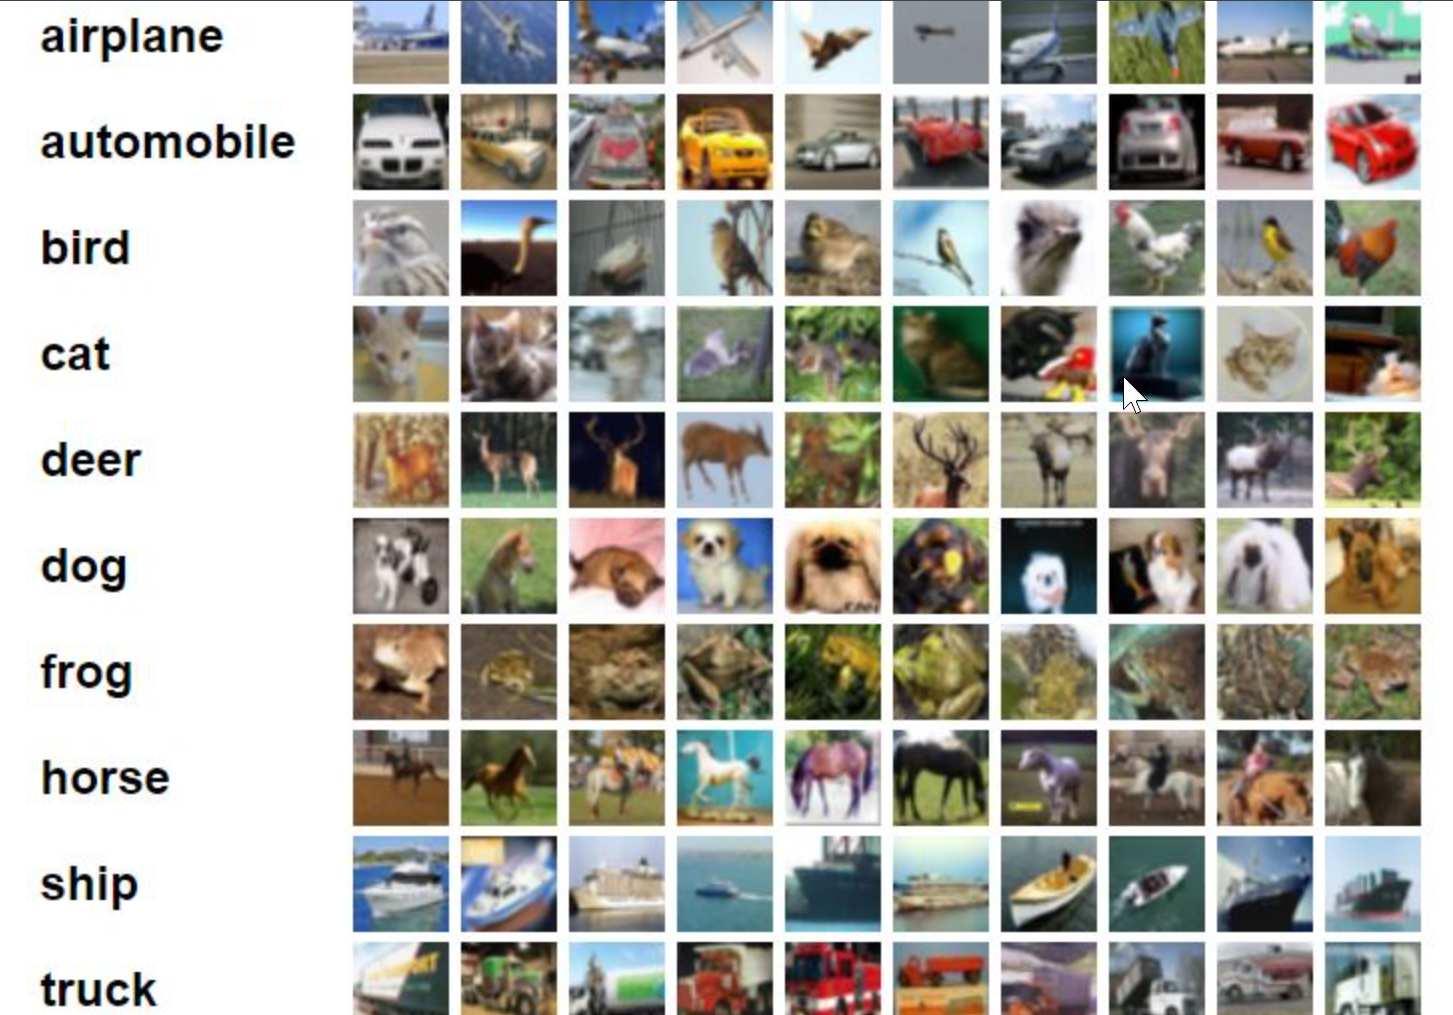

In [5]:
(X_train, Y_train), (X_test,Y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 351s 2us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
Y_train.shape

(50000, 1)

In [12]:
Y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Data Visualization

In [8]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

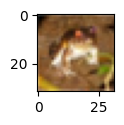

In [9]:
plot_sample(0)

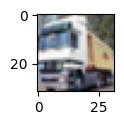

In [10]:
plot_sample(1)

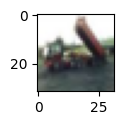

In [11]:
plot_sample(2)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
classes[Y_train[3][0]]

'deer'

In [16]:
Y_test.shape

(10000, 1)

Preprocessing: Scale images

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

One hot encoding

In [20]:
Y_train_categorical = keras.utils.to_categorical(
    Y_train, num_classes=10
)
Y_test_categorical = keras.utils.to_categorical(
    Y_test, num_classes=10
)

In [24]:
Y_test[0:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [23]:
Y_test_categorical[0:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

Model building and training

Difference between **categorical_crossentropy** and **sparse_categorical_crossentropy** is that first one is used for classification and the second is used for regression.

In [36]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, Y_train_categorical, epochs=10)

C:\Users\ebrah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.3052 - loss: 1.9294
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.4198 - loss: 1.6463
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.4474 - loss: 1.5571
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.4745 - loss: 1.4931
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4931 - loss: 1.4367
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.5114 - loss: 1.3954
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.5248 - loss: 1.3568
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.5384 - loss: 1.3149
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5449 - loss: 1.2888
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5614 - loss: 1.2516


In [43]:
classes[np.argmax(model.predict(X_test_scaled)[57])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


'truck'

In [44]:
classes[Y_test[57][0]]

'horse'

In [45]:
model.evaluate(X_test_scaled,Y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5332 - loss: 1.3354


[1.3404700756072998, 0.527899980545044]

https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/10_gpu_benchmarking/gpu_performance_test_small_image_classification.ipynb

If you have GPU then you can refer to the above given notebook link to compare the performance of the model on GPU and CPU.